# City Bike Views

Based on the data available at [Divvy Data](https://www.divvybikes.com/system-data), some ways to look at the data.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [3]:
%matplotlib inline

## The data

[Divvy Data](https://www.divvybikes.com/system-data) publishes a sample of the data. 

In [4]:
from pyensae.datasource import download_data
file = download_data("Divvy_Trips_2016_Q3Q4.zip", url="https://s3.amazonaws.com/divvy-data/tripdata/")

In [5]:
import pandas
stations = pandas.read_csv("Divvy_Stations_2016_Q3.csv")
bikes = pandas.concat([pandas.read_csv("Divvy_Trips_2016_Q3.csv"),
                       pandas.read_csv("Divvy_Trips_2016_Q4.csv")])

In [6]:
bikes.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,12150160,9/30/2016 23:59:58,10/1/2016 00:04:03,4959,245,69,Damen Ave & Pierce Ave,17,Wood St & Division St,Subscriber,Male,1988.0
1,12150159,9/30/2016 23:59:58,10/1/2016 00:04:09,2589,251,383,Ashland Ave & Harrison St,320,Loomis St & Lexington St,Subscriber,Female,1990.0
2,12150158,9/30/2016 23:59:51,10/1/2016 00:24:51,3656,1500,302,Sheffield Ave & Wrightwood Ave,334,Lake Shore Dr & Belmont Ave,Customer,NaN,NaN
3,12150157,9/30/2016 23:59:51,10/1/2016 00:03:56,3570,245,475,Washtenaw Ave & Lawrence Ave,471,Francisco Ave & Foster Ave,Subscriber,Female,1988.0
4,12150156,9/30/2016 23:59:32,10/1/2016 00:26:50,3158,1638,302,Sheffield Ave & Wrightwood Ave,492,Leavitt St & Addison St,Customer,NaN,NaN


## About age

In [8]:
from datetime import datetime, time
df = bikes
df["dtstart"] = pandas.to_datetime(df.starttime, infer_datetime_format=True)
df["dtstop"] = pandas.to_datetime(df.stoptime, infer_datetime_format=True)
df["stopday"] = df.dtstop.apply(lambda r: datetime(r.year, r.month, r.day))
df["stoptime"] = df.dtstop.apply(lambda r: time(r.hour, r.minute, 0))
df["stoptime10"] = df.dtstop.apply(lambda r: time(r.hour, (r.minute // 10)*10, 0))  # every 10 minutes
df['stopweekday'] = df['dtstop'].dt.dayofweek

In [9]:
df['duration'] = df["dtstop"] -  df["dtstart"]
df["age"] = - df["birthyear"] + 2016
df['duration_sec'] = df['duration'].apply(lambda x: x.total_seconds())

In [10]:
df["stoptime_sec"] = df.dtstop.apply(lambda r: r.hour * 60 + r.minute)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_id,2.12564e+06,1.16993e+07,731388,1.04267e+07,1.10663e+07,1.17015e+07,1.23313e+07,1.29792e+07
bikeid,2.12564e+06,3251.98,1730.44,1,1755,3446,4802,5920
tripduration,2.12564e+06,1008.55,1816.1,60,416,716,1195,86365
from_station_id,2.12564e+06,179.916,130.524,2,75,157,268,620
to_station_id,2.12564e+06,180.352,130.488,2,75,157,272,620
birthyear,1.59034e+06,1980.79,10.754,1899,1975,1984,1989,2000
stopweekday,2.12564e+06,2.95275,2.02016,0,1,3,5,6
duration,2125643,0 days 00:16:48.183487,0 days 00:30:15.597468,0 days 00:00:59,0 days 00:06:56,0 days 00:11:56,0 days 00:19:55,0 days 23:59:24
age,1.59034e+06,35.2129,10.754,16,27,32,41,117
duration_sec,2.12564e+06,1008.18,1815.6,59,416,716,1195,86364


In [13]:
df.shape

(2125643, 21)

We take a random sample.

In [15]:
import random
ens = pandas.Series([random.randint(0,99) for i in range(df.shape[0])])
sample = df[ens==0]

c:\python35_x64\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [16]:
sample.shape
sample = sample[(sample.age < 100) & (sample.duration_sec < 3600)]

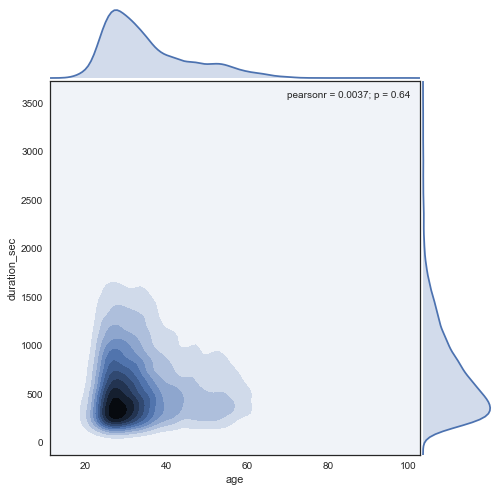

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
g = sns.jointplot(sample.age, sample.duration_sec, kind="kde", size=7, space=0)

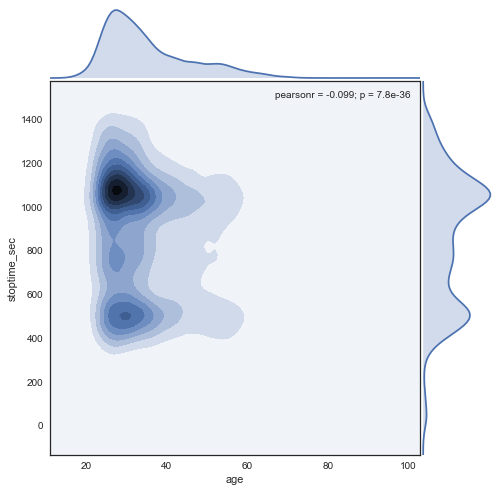

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
g = sns.jointplot(sample.age, sample.stoptime_sec, kind="kde", size=7, space=0)

The duration seems correlated to the age. Let's see. Younger people during the weekend are more active and bike longer.

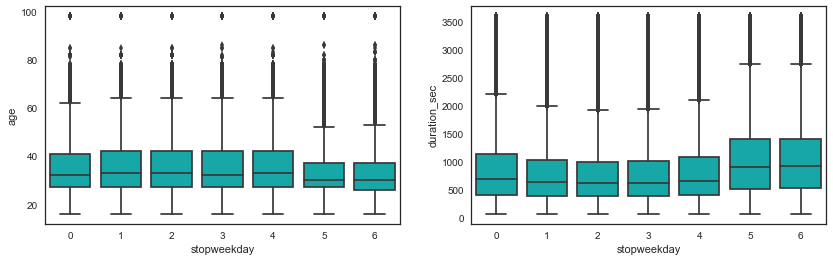

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.boxplot(x="stopweekday", y="age", data=df[df.age < 100], color="c", ax=ax[0])
sns.boxplot(x="stopweekday", y="duration_sec", data=df[df.duration_sec < 3600], color="c", ax=ax[1])

However, linear correlations are not so great.

In [21]:
df.corr()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,stopweekday,age,duration_sec
trip_id,1.000000,-0.025039,-0.071566,0.008129,0.005505,-0.035032,-0.067585,0.035032,-0.071514
bikeid,-0.025039,1.000000,0.001088,0.009959,0.009538,-0.010901,0.000779,0.010901,0.001090
tripduration,-0.071566,0.001088,1.000000,-0.008972,-0.004730,-0.009788,0.069885,0.009788,0.999969
from_station_id,0.008129,0.009959,-0.008972,1.000000,0.386314,0.019982,0.019426,-0.019982,-0.008970
to_station_id,0.005505,0.009538,-0.004730,0.386314,1.000000,0.021198,0.011177,-0.021198,-0.004734
birthyear,-0.035032,-0.010901,-0.009788,0.019982,0.021198,1.000000,0.057081,-1.000000,-0.009808
stopweekday,-0.067585,0.000779,0.069885,0.019426,0.011177,0.057081,1.000000,-0.057081,0.069848
age,0.035032,0.010901,0.009788,-0.019982,-0.021198,-1.000000,-0.057081,1.000000,0.009808
duration_sec,-0.071514,0.001090,0.999969,-0.008970,-0.004734,-0.009808,0.069848,0.009808,1.000000


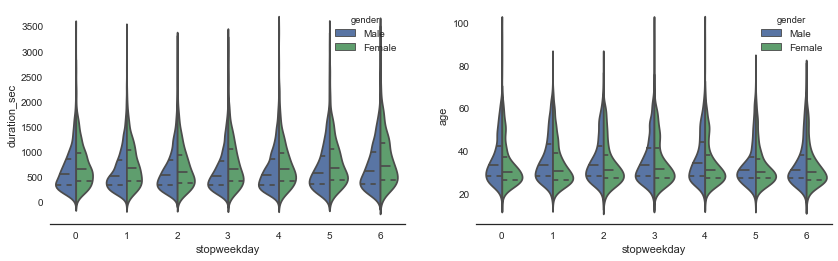

In [23]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.violinplot(x="stopweekday", y="duration_sec", hue="gender", data=sample, split=True, inner="quart", ax=ax[0])
sns.violinplot(x="stopweekday", y="age", hue="gender", data=sample, split=True, inner="quart", ax=ax[1])
sns.despine(left=True)

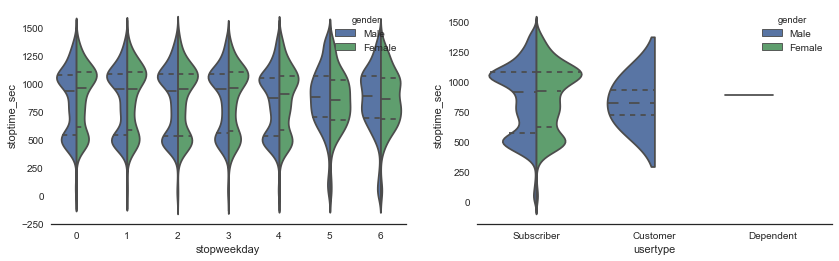

In [24]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.violinplot(x="stopweekday", y="stoptime_sec", hue="gender", data=sample, split=True, inner="quart", ax=ax[0])
sns.violinplot(x="usertype", y="stoptime_sec", hue="gender", data=sample, split=True, inner="quart", ax=ax[1])
sns.despine(left=True)

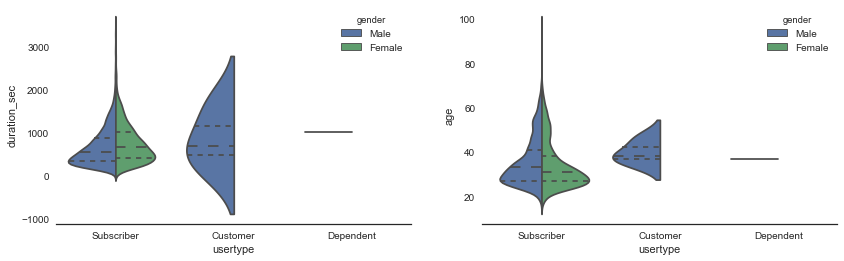

In [25]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.violinplot(x="usertype", y="duration_sec", hue="gender", data=sample, split=True, inner="quart", ax=ax[0])
sns.violinplot(x="usertype", y="age", hue="gender", data=sample, split=True, inner="quart", ax=ax[1])
sns.despine(left=True)

## Non-linear correlations

We apply the following [Corrélations non linéaires](http://www.xavierdupre.fr/app/mlstatpy/helpsphinx/notebooks/correlation_non_lineaire.html#overfitting).

In [26]:
sample2 = sample.copy()
sample2["age_inv"] = sample2.age ** -1
sample2["gender_num"] = sample2.gender.apply(lambda x: (1 if x == "Male" else 0))
sample2["usertype_num"] = sample2.usertype.apply(lambda x: (1 if x == "Subscriber" else 0))
sample2.corr()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,stopweekday,age,duration_sec,stoptime_sec,age_inv,gender_num,usertype_num
trip_id,1.000000,-0.025699,-0.111461,-0.017589,-0.017987,-0.051042,-0.045511,0.051042,-0.110983,-0.047542,-0.045587,0.045794,-0.008499
bikeid,-0.025699,1.000000,0.028205,0.010105,0.012043,-0.006976,0.008423,0.006976,0.028189,-0.000671,-0.007407,0.034934,-0.008222
tripduration,-0.111461,0.028205,1.000000,0.039784,0.033001,-0.003718,0.053490,0.003718,0.999999,0.071967,-0.010841,-0.092842,-0.007501
from_station_id,-0.017589,0.010105,0.039784,1.000000,0.386384,0.012226,0.040640,-0.012226,0.039784,-0.009510,0.022851,-0.028520,0.016728
to_station_id,-0.017987,0.012043,0.033001,0.386384,1.000000,0.013090,0.032375,-0.013090,0.032990,0.087883,0.019515,-0.028180,0.009623
birthyear,-0.051042,-0.006976,-0.003718,0.012226,0.013090,1.000000,0.062839,-1.000000,-0.003741,0.099145,0.949064,-0.065785,0.006078
stopweekday,-0.045511,0.008423,0.053490,0.040640,0.032375,0.062839,1.000000,-0.062839,0.053472,-0.001145,0.065431,-0.034490,-0.004490
age,0.051042,0.006976,0.003718,-0.012226,-0.013090,-1.000000,-0.062839,1.000000,0.003741,-0.099145,-0.949064,0.065785,-0.006078
duration_sec,-0.110983,0.028189,0.999999,0.039784,0.032990,-0.003741,0.053472,0.003741,1.000000,0.071944,-0.010856,-0.092824,-0.007493
stoptime_sec,-0.047542,-0.000671,0.071967,-0.009510,0.087883,0.099145,-0.001145,-0.099145,0.071944,1.000000,0.096960,-0.022612,0.000546


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import numpy

def correlation_cross_val(df, model, draws=5, **params):
    cor = df.corr()    
    df = scale(df[cor.columns])
    for i in range(cor.shape[0]):
        xi = df[:, i:i+1]
        for j in range(cor.shape[1]):
            xj = df[:, j]
            mem = []
            for k in range(0, draws):
                xi_train, xi_test, xj_train, xj_test = train_test_split(xi, xj, train_size=0.5)
                mod = model(**params)
                mod.fit(xi_train, xj_train)
                v = mod.predict(xi_test)
                c = (1 - numpy.var(v - xj_test))
                mem.append(max(c, 0) **0.5)
            cor.iloc[i,j] = sum(mem) / len(mem)
    return cor

from sklearn.tree import DecisionTreeRegressor
cor = correlation_cross_val(sample2, DecisionTreeRegressor, draws=20)
cor

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,stopweekday,age,duration_sec,stoptime_sec,age_inv,gender_num,usertype_num
trip_id,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990189,0.000000,0.000000,0.878744,0.000000,0.000000,0.000795
bikeid,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089611
tripduration,0.000000,0.000000,0.999992,0.000000,0.000000,0.000000,0.000000,0.000000,0.999991,0.000000,0.000000,0.000000,0.155992
from_station_id,0.000000,0.000000,0.110875,1.000000,0.550136,0.065097,0.000000,0.077291,0.101562,0.012903,0.112931,0.000000,0.251102
to_station_id,0.000000,0.000000,0.110672,0.535644,0.999999,0.101265,0.000000,0.086750,0.116534,0.225081,0.124868,0.000000,0.175200
birthyear,0.012664,0.011642,0.034007,0.029203,0.019324,0.999955,0.031880,0.999862,0.019822,0.059479,0.999999,0.060929,0.154623
stopweekday,0.058372,0.035156,0.068426,0.069479,0.050559,0.072991,1.000000,0.066999,0.072995,0.052968,0.089624,0.055000,0.341171
age,0.017813,0.009398,0.028311,0.024907,0.054947,0.999985,0.054322,0.999990,0.053829,0.040167,0.999999,0.060365,0.219234
duration_sec,0.000000,0.000000,0.999993,0.000000,0.000000,0.000000,0.000000,0.000000,0.999991,0.000000,0.000000,0.000000,0.135487
stoptime_sec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.158506


*from_station_id* and *start_station_id* seem related. Which means there is frequent trip. Funny, the trip id can explain the stopping time... It should be removed from any dataset.

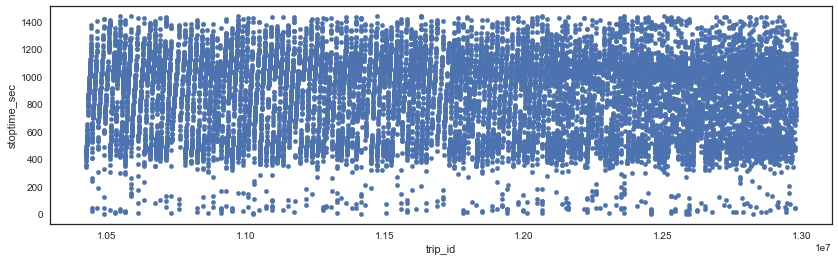

In [30]:
sample2.plot(x="trip_id", y="stoptime_sec", kind="scatter", figsize=(14,4))